# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-2, 1e-4]
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for optimizer1 in ['adam', 'sgd', 'rmsprop']:
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment optimizer = %s with LR = %.6f" % (optimizer1,lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-%s-lr-%s" % (optimizer1,str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment optimizer = adam with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===========

50000/50000 [==============================] - 8s 155us/step - loss: 1.7719 - acc: 0.3836 - val_loss: 1.7690 - val_acc: 0.3817
Epoch 15/30
50000/50000 [==============================] - 8s 151us/step - loss: 1.7609 - acc: 0.3877 - val_loss: 1.7601 - val_acc: 0.3853
Epoch 16/30
50000/50000 [==============================] - 8s 154us/step - loss: 1.7509 - acc: 0.3908 - val_loss: 1.7486 - val_acc: 0.3901
Epoch 17/30
50000/50000 [==============================] - 8s 151us/step - loss: 1.7418 - acc: 0.3944 - val_loss: 1.7397 - val_acc: 0.3949
Epoch 18/30
50000/50000 [==============================] - 8s 151us/step - loss: 1.7326 - acc: 0.3970 - val_loss: 1.7319 - val_acc: 0.3965
Epoch 19/30
50000/50000 [==============================] - 8s 154us/step - loss: 1.7241 - acc: 0.4021 - val_loss: 1.7252 - val_acc: 0.3994
Epoch 20/30
50000/50000 [==============================] - 8s 153us/step - loss: 1.7161 - acc: 0.4037 - val_loss: 1.7182 - val_acc: 0.3988
Epoch 21/30
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 162us/step - loss: 2.2428 - acc: 0.1914 - val_loss: 2.1663 - val_acc: 0.2437
Epoch 2/30
50000/50000 [==============================] - 8s 159us/step - loss: 2.1138 - acc: 0.2640 - val_loss: 2.0699 - val_acc: 0.2814
Epoch 3/30
50000/50000 [==============================] - 8s 155us/step - loss: 2.0331 - acc: 0.2892 - val_loss: 2.0047 - val_acc: 0.2970
Epoch 4/30
50000/50000 [==============================] - 8s 157us/step - loss: 1.9767 - acc: 0.3064 - val_loss: 1.9573 - val_acc: 0.3086
Epoch 5/30
50000/50000 [==============================] - 8s 155us/step - loss: 1.9353 - acc: 0.3207 - val_loss: 1.9215 - val_acc: 0.3197
Epoch 6/30
50000/50000 [==============================] - 8s 156us/step - loss: 1.9039 - acc: 0.3315 - val_loss: 1.8946 - val_acc: 0.3330
Epoch 7/30
50000/50000 [==============================] - 8s 154us/step - loss: 1.8795 - acc: 0.3404 - val_loss: 1.8721 - 

Epoch 22/30
50000/50000 [==============================] - 8s 156us/step - loss: 0.9239 - acc: 0.6723 - val_loss: 1.3668 - val_acc: 0.5406
Epoch 23/30
50000/50000 [==============================] - 8s 152us/step - loss: 0.8963 - acc: 0.6777 - val_loss: 1.4447 - val_acc: 0.5292
Epoch 24/30
50000/50000 [==============================] - 7s 150us/step - loss: 0.8650 - acc: 0.6922 - val_loss: 1.4242 - val_acc: 0.5315
Epoch 25/30
50000/50000 [==============================] - 8s 151us/step - loss: 0.8438 - acc: 0.7011 - val_loss: 1.3817 - val_acc: 0.5457
Epoch 26/30
50000/50000 [==============================] - 8s 150us/step - loss: 0.8198 - acc: 0.7060 - val_loss: 1.4528 - val_acc: 0.5326
Epoch 27/30
50000/50000 [==============================] - 8s 153us/step - loss: 0.7968 - acc: 0.7179 - val_loss: 1.4458 - val_acc: 0.5401
Epoch 28/30
50000/50000 [==============================] - 8s 152us/step - loss: 0.7755 - acc: 0.7220 - val_loss: 1.4370 - val_acc: 0.5402
Epoch 29/30
50000/50000 [==

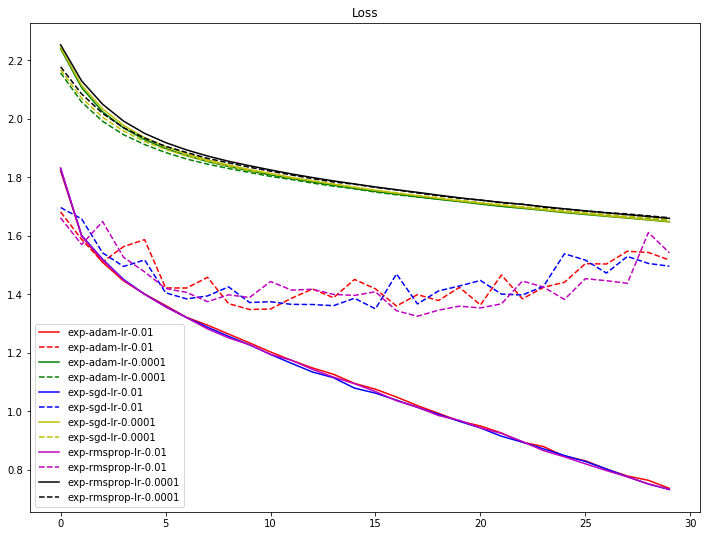

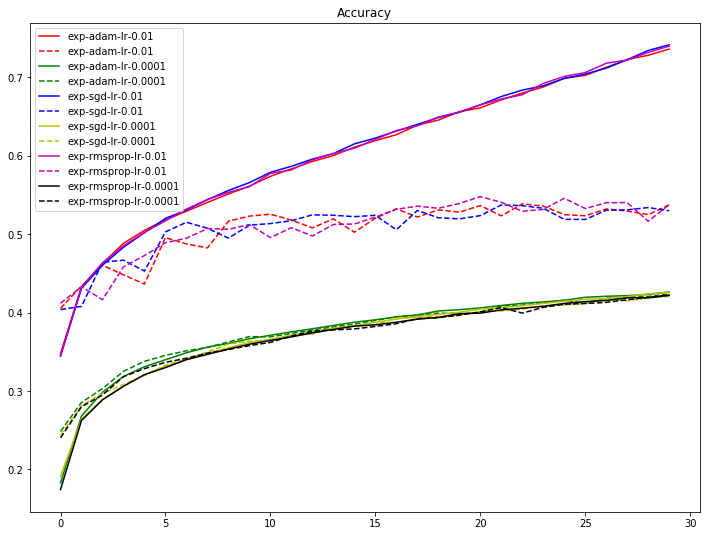

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()